In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

load data

In [2]:
data = pd.read_csv("./machine learning datasets/3.12. Example.csv")
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


satisfaction is a self report based from range [1-10]
Brand loyalty. there is no widely acceptable techniques to measure it but there are proxies like churn rate,retention rate,or customers lifetime value(clv)
loyal was measure by purchase per year + other factors
the ranges -2.5 to 2.5 as the value is already standardise

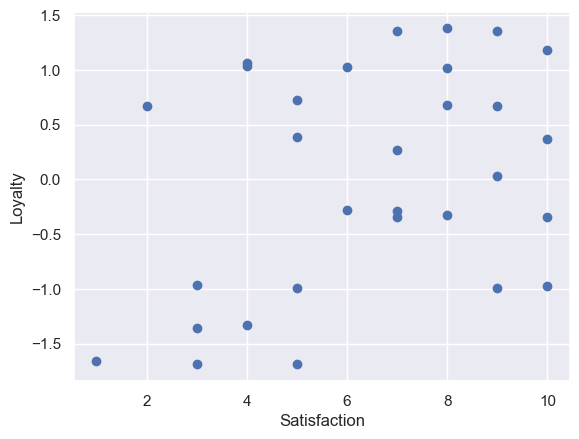

In [3]:
#plot the data
plt.scatter(data["Satisfaction"], data["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

select features

In [4]:
x = data.copy()

clustering

In [5]:
kmeans = KMeans(2)

In [6]:
kmeans.fit(x)

KMeans(n_clusters=2)

clustering result

In [7]:
cluster = x.copy()
cluster["Cluster_pred"] = kmeans.fit_predict(x)
cluster

,Satisfaction,Loyalty,Cluster_pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


plotting

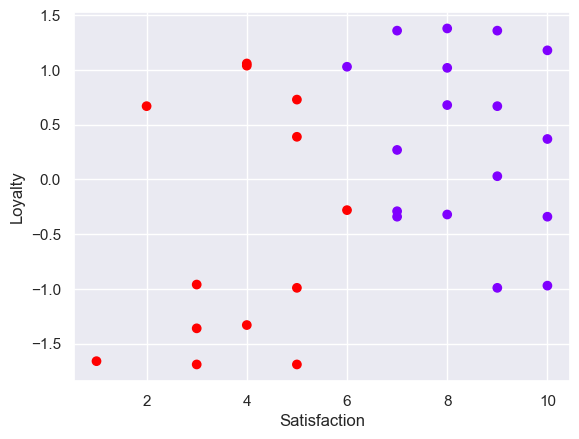

In [8]:
plt.scatter(cluster["Satisfaction"], cluster["Loyalty"], c=cluster["Cluster_pred"],cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

there is a satisfaction at 6 which will divide the cluster into 2 separate clusters with may be ok to some.
most probably,the algorithm only considere satisfaction as a feature and not consider loyalty.
loyalty is also an important feature so how can we fix this problem to give equal weight and that is by standardization

standardize our features

In [10]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled


array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

take advantage of the elbow method

In [11]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss


[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.34807941029098,
 4.380320178840311,
 3.7282834443589534]

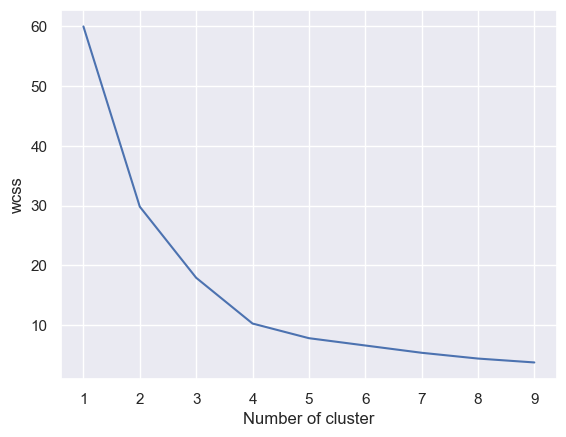

In [12]:
plt.plot(range(1,10),wcss)
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.show()

given the plot, think of the best cluster to use.
we can see the change in the number of clusters but we dont know the best solution

exploring clustering solution and select the number of clusters

In [19]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new["Cluster_pred"] = kmeans_new.fit_predict(x_scaled)
cluster_new


,Satisfaction,Loyalty,Cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


we used the original satisfactory and loyalty factor but with the standardised cluster value

ploting the cluster_new

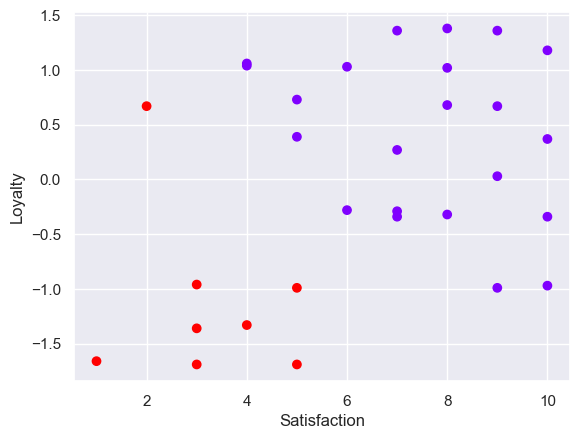

In [20]:
plt.scatter(cluster_new["Satisfaction"], cluster_new["Loyalty"], c=cluster_new["Cluster_pred"],cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

the data is plotted without standardization but the solution itself is a standardized one.

if you plot the standardized one, you will be deceived

from the plot, let us rename our clusters

1. Alienated(low satisfaction who are likely not to return to our shop(red seed))

2. everything else cluster()

ajust the cluster value to 3 and rerun
you will have 
1. Alienated
2. supporters(some woulnd want to come back why some still want to come)
3. all that is left clusters

adjust to 4 clusters and rerun
1. Alienated
2. supporters
3. upper ones are very satisfied customers(fans)
4. Roamers(they like your brand but are not very loyal to it)
this gives the best solution sofar

adjust to 5 cluster and you have two set of roamers

therefore, 4 and 4 are the best clusters here

from 4 clusters
the question is how do we increase our satifcation to get the supporters as our fans and how do we get the roamers to become our fans.maybe increase our cashier to avoid long waiting queue to get the supporters back and maybe introduce raffle draw or discounts to the thr roamers as our full fans.
for the alienated, you may have nothing much to do